*This is from Aftab Mirza, for the submission of project for ShapeAI Data Analyst internship.*

To begin with, we'll import the necessary libraries. Along with that, I am referencing the regression algorithm/formula (as an image) that will be used in this problem statement.


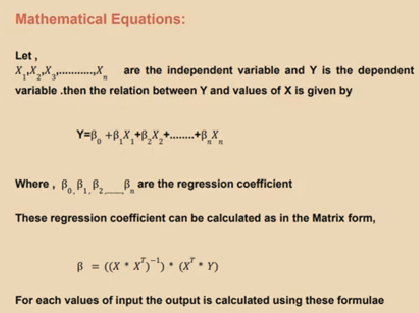

In [10]:
import pandas as pd
import numpy as np  

from IPython.display import Image
Image('Algorithm.PNG')

Next, I take in the dataset for Ultrabook prices. That said, the dataset is quite underwhelming and definitely in need of improvement -- so, sorry for that...

I copy the path to the csv file, and then we see our dataset at a glance. 

In [11]:
data_frame=pd.read_csv('/content/Ultrabook Price Forecastor 1442.csv')
print(data_frame)

     Maker  Intel Core i-  Generation   GHz  ...   SSD  VRAM  Screen   Cost
0        1              3           7  2.29  ...     0     0    15.6  39057
1        1              3           7  2.30  ...     0     0    15.6  45141
2        2              3           7  2.30  ...   256     0    14.0  35999
3        4              3           7  2.30  ...     0     0    14.0  39990
4        2              3           7  2.40  ...     0     0    15.6  36263
..     ...            ...         ...   ...  ...   ...   ...     ...    ...
105      3              9          10  2.00  ...   512     1    17.3  45000
106      4              9          10  2.00  ...     0     1    13.3  78000
107      4              3          11  1.00  ...  1024     1    12.0  87000
108      1              5           9  2.00  ...  1024     4    12.0  57000
109      2              5           9  3.00  ...     0     2    13.3  45000

[110 rows x 10 columns]


In [12]:
data_frame.columns

Index(['Maker', 'Intel Core i-', 'Generation', 'GHz', 'RAM', 'HDD', 'SSD',
       'VRAM', 'Screen', 'Cost'],
      dtype='object')

Here, two variables viz. X & Y have been defined. X denotes input data while Y denotes output data. 

X is basically the feature set. **Y will be the output of trained data.**

In [13]:
X=data_frame[data_frame.columns[:9]]
Y=data_frame[data_frame.columns[9:]]
print(X)
print(Y)

print(X.shape)
print(Y.shape)



     Maker  Intel Core i-  Generation   GHz  RAM   HDD   SSD  VRAM  Screen
0        1              3           7  2.29    4  1000     0     0    15.6
1        1              3           7  2.30    4  1000     0     0    15.6
2        2              3           7  2.30    8     0   256     0    14.0
3        4              3           7  2.30    4  1000     0     0    14.0
4        2              3           7  2.40    4  1000     0     0    15.6
..     ...            ...         ...   ...  ...   ...   ...   ...     ...
105      3              9          10  2.00    4   500   512     1    17.3
106      4              9          10  2.00    4  1000     0     1    13.3
107      4              3          11  1.00    4   500  1024     1    12.0
108      1              5           9  2.00    6   500  1024     4    12.0
109      2              5           9  3.00    6  1000     0     2    13.3

[110 rows x 9 columns]
      Cost
0    39057
1    45141
2    35999
3    39990
4    36263
..     ...

Here, we convert the variables to NumPy array -- for faster calculations and other benefits.

In [14]:
X_array=X.to_numpy()
print(X_array)
print('\n')
Y_array=Y.to_numpy()
print(Y_array)
print('\n')
print(X_array.shape)
print(Y_array.shape)



[[1.000e+00 3.000e+00 7.000e+00 2.290e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.560e+01]
 [1.000e+00 3.000e+00 7.000e+00 2.300e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.560e+01]
 [2.000e+00 3.000e+00 7.000e+00 2.300e+00 8.000e+00 0.000e+00 2.560e+02
  0.000e+00 1.400e+01]
 [4.000e+00 3.000e+00 7.000e+00 2.300e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.400e+01]
 [2.000e+00 3.000e+00 7.000e+00 2.400e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.560e+01]
 [2.000e+00 2.000e+00 4.000e+00 2.300e+00 4.000e+00 5.000e+02 2.560e+02
  0.000e+00 1.400e+01]
 [3.000e+00 3.000e+00 7.000e+00 2.300e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.560e+01]
 [2.000e+00 5.000e+00 8.000e+00 1.600e+00 8.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.400e+01]
 [3.000e+00 1.000e+00 3.000e+00 1.800e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.560e+01]
 [1.000e+00 3.000e+00 8.000e+00 3.900e+00 4.000e+00 1.000e+03 0.000e+00
  0.000e+00 1.400e+01]
 [2.000e+00 3.000e+00 7.000e+00 2.300e+00 8.000e+0

A Function to emulate Regression Co-efficient has been used, keeping in use the second formula displayed in the beginning of this notebook. 

We save it in **'B'**.

In [15]:
def reg_coef10(X,Y):
  X_array=X.to_numpy()
  Y_array=Y.to_numpy()
  X_new=np.ones((110,10))
  for i,data in enumerate(X_array):
    X_new[i,1:]=data
  return np.matmul(np.linalg.inv(np.matmul(X_new.T,X_new)), np.matmul(X_new.T, Y_array))
B=reg_coef10(X,Y)
print("Test\n:",B)



Test
: [[ 8.39222991e+04]
 [-1.13800075e+03]
 [ 8.44293187e+03]
 [-5.73688411e+03]
 [-1.05931179e+04]
 [ 9.06397006e+03]
 [-3.62471743e+01]
 [-1.17597496e+01]
 [ 1.32924052e+03]
 [-4.03560387e+02]]


Now using the second formula displayed in the beginning of the notebook to calculate the ultimate output!

In [16]:
def Ultrabook_Cost(B, maker, inteli, intgen, cpuspeed, ram, hdd, ssd, vram, scrsize):
  return B[0]+B[1]*maker+B[2]*inteli+B[3]*intgen+B[4]*cpuspeed+B[5]*ram+B[6]*hdd+B[7]*ssd+B[8]*vram+B[9]*scrsize

In [18]:
print (" Company Code: 1= Dell, 2= HP, 3= Lenovo, 4= Asus")
i=0
while i==0:
  maker=float(input("Which brand do you prefer? "))
  if maker>=1 and maker<=4:
    i=1
  else:
    print("Please, select from the available options!")

inteli=float(input("Enter the required Intel Core i:"))
intgen=float(input("Enter the required Generation of your preferred Core: "))
cpuspeed=float(input("What is the CPU clock cycle speed you are aiming for (in GHz)? "))
ram=float(input("Enter the RAM you desire in GBs: "))
hdd=float(input("It will be nice to have HDDs (along with SSD), so how much of HDD you want? "))
ssd=float(input("The required SSD? "))
vram=float(input("Since you would be doing some UI intensive tasks, enter the Graphic Card memory you think you need in GBs: "))
scrsize=float(input("The screen size you fancy? TIP: Aim for portability!: "))
Cost=Ultrabook_Cost(B, maker,inteli,intgen,cpuspeed,ram,hdd,ssd,vram,scrsize)
print("The price of your special laptop would be around: ", '{:0.2f}'.format(Cost[0]))


 Company Code: 1= Dell, 2= HP, 3= Lenovo, 4= Asus
Which brand do you prefer? 4
Enter the required Intel Core i:5
Enter the required Generation of your preferred Core: 11
What is the CPU clock cycle speed you are aiming for (in GHz)? 3
Enter the RAM you desire in GBs: 8
It will be nice to have HDDs (along with SSD), so how much of HDD you want? 1000
The required SSD? 256
Since you would be doing some UI intensive tasks, enter the Graphic Card memory you think you need in GBs: 0
The screen size you fancy? TIP: Aim for portability!: 13
The price of your special laptop would be around:  54707.68
